# 13.14. 实战Kaggle比赛：狗的品种识别（ImageNet Dogs）

本节我们将在Kaggle上实战狗品种识别问题。 本次比赛网址是https://www.kaggle.com/c/dog-breed-identification。 图13.14.1显示了鉴定比赛网页上的信息。 需要一个Kaggle账户才能提交结果。

在这场比赛中，我们将识别120类不同品种的狗。 这个数据集实际上是著名的ImageNet的数据集子集。与 13.13节中CIFAR-10数据集中的图像不同， ImageNet数据集中的图像更高更宽，且尺寸不一。



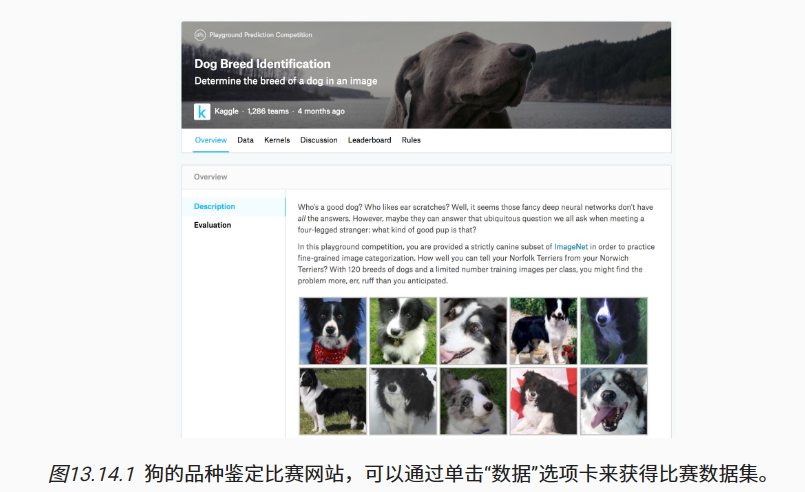

In [1]:
import os
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

## 13.14.1. 获取和整理数据集
比赛数据集分为训练集和测试集，分别包含RGB（彩色）通道的10222张、10357张JPEG图像。 在训练数据集中，有120种犬类，如拉布拉多、贵宾、腊肠、萨摩耶、哈士奇、吉娃娃和约克夏等。

### 13.14.1.1. 下载数据集
登录Kaggle后，可以点击 图13.14.1中显示的竞争网页上的“数据”选项卡，然后点击“全部下载”按钮下载数据集。在../data中解压下载的文件后，将在以下路径中找到整个数据集：

../data/dog-breed-identification/labels.csv

../data/dog-breed-identification/sample_submission.csv

../data/dog-breed-identification/train

../data/dog-breed-identification/test

上述结构与 13.13节的CIFAR-10类似，其中文件夹train/和test/分别包含训练和测试狗图像，labels.csv包含训练图像的标签。

同样，为了便于入门，我们提供完整数据集的小规模样本：train_valid_test_tiny.zip。 如果要在Kaggle比赛中使用完整的数据集，则需要将下面的demo变量更改为False。

In [2]:
#@save
d2l.DATA_HUB['dog_tiny'] = (d2l.DATA_URL + 'kaggle_dog_tiny.zip',
                            '0cb91d09b814ecdc07b50f31f8dcad3e81d6a86d')

# 如果使用Kaggle比赛的完整数据集，请将下面的变量更改为False
demo = True
if demo:
    data_dir = d2l.download_extract('dog_tiny')
else:
    data_dir = os.path.join('..', 'data', 'dog-breed-identification')